In [18]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.2.1


In [2]:
#allel.vcf_to_hdf5('/wrk/Gen_Tree/GenTree_Genome_mapping/Pinus_sylvestris/Psylvestris_GM_Oulu_filtered_v2.vcf', '/wrk/Gen_Tree/GenTree_Genome_mapping/Pinus_sylvestris/Psylvestris_GM_Oulu_filtered_v2.h5', fields='*', overwrite=True)

In [19]:
callset_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Pinus_sylvestris/Psylvestris_GM_Oulu_filtered_v2.h5'
callset = h5py.File(callset_fn, mode='r')
callset

<HDF5 file "Psylvestris_GM_Oulu_filtered_v2.h5" (mode r)>

In [20]:
sorted(callset.keys())

['calldata', 'samples', 'variants']

In [21]:
variants = callset['variants']
variants

<HDF5 group "/variants" (36 members)>

In [22]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'QUAL', 'AN', 'MQ', 'QD', 'SOR', 'MQRankSum', 'ReadPosRankSum', 'numalt'])
variants

<VariantChunkedTable shape=(969462,) dtype=[('POS', '<i4'), ('REF', 'O'), ('ALT', 'O', (3,)), ('DP', '<i4'), ('QUAL', '<f4'), ('AN', '<i4'), ('MQ', '<f4'), ('QD', '<f4'), ('SOR', '<f4'), ('MQRankSum', '<f4'), ('ReadPosRankSum', '<f4'), ('numalt', '<i4')]
   nbytes=66.6M cbytes=24.6M cratio=2.7
   values=h5py._hl.group.Group>

In [23]:
def plot_variant_hist(f, bins=30):
    x = variants[f][:]
    fig, ax = plt.subplots(figsize=(7, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('Variant %s distribution' % f)

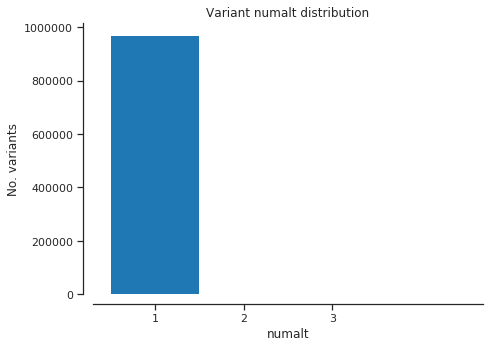

In [24]:
plot_variant_hist('numalt', bins=np.arange(0.5, 5.5, 1))
plt.gca().set_xticks([1,2,3])

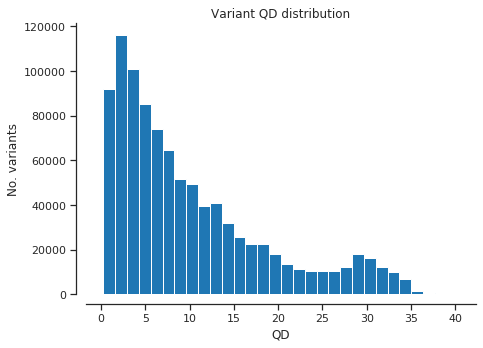

In [25]:
plot_variant_hist('QD')

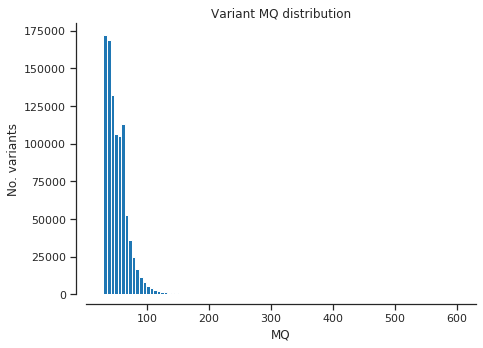

In [26]:
plot_variant_hist('MQ', bins=100)

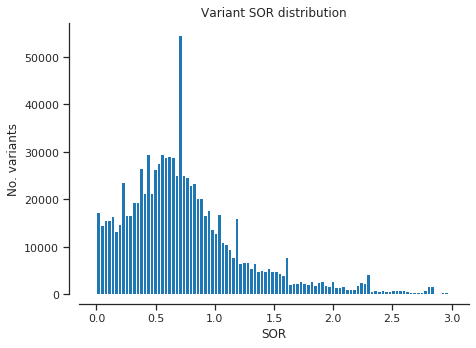

In [27]:
plot_variant_hist('SOR', bins=100)

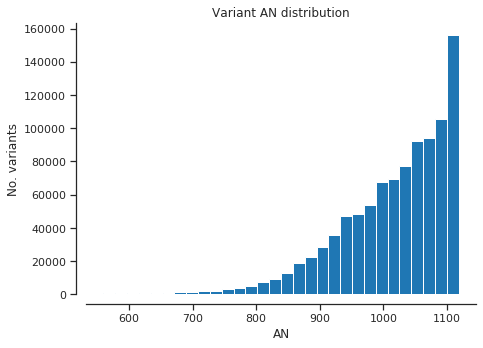

In [28]:
plot_variant_hist('AN')

In [29]:
samples = callset['samples']
samples = list(samples)
samples

['CH_PS_5_1',
 'CH_PS_5_10',
 'CH_PS_5_11',
 'CH_PS_5_12',
 'CH_PS_5_13',
 'CH_PS_5_14',
 'CH_PS_5_15',
 'CH_PS_5_16',
 'CH_PS_5_17',
 'CH_PS_5_18',
 'CH_PS_5_19',
 'CH_PS_5_2',
 'CH_PS_5_20',
 'CH_PS_5_21',
 'CH_PS_5_22',
 'CH_PS_5_23',
 'CH_PS_5_24',
 'CH_PS_5_25',
 'CH_PS_5_3',
 'CH_PS_5_4',
 'CH_PS_5_5',
 'CH_PS_5_6',
 'CH_PS_5_7',
 'CH_PS_5_8',
 'CH_PS_5_9',
 'CH_PS_6_1',
 'CH_PS_6_10',
 'CH_PS_6_11',
 'CH_PS_6_12',
 'CH_PS_6_13',
 'CH_PS_6_14',
 'CH_PS_6_15',
 'CH_PS_6_16',
 'CH_PS_6_17',
 'CH_PS_6_18',
 'CH_PS_6_19',
 'CH_PS_6_2',
 'CH_PS_6_20',
 'CH_PS_6_21',
 'CH_PS_6_22',
 'CH_PS_6_23',
 'CH_PS_6_24',
 'CH_PS_6_25',
 'CH_PS_6_3',
 'CH_PS_6_4',
 'CH_PS_6_5',
 'CH_PS_6_6',
 'CH_PS_6_7',
 'CH_PS_6_8',
 'CH_PS_6_9',
 'DE_PS_11_1',
 'DE_PS_11_10',
 'DE_PS_11_11',
 'DE_PS_11_12',
 'DE_PS_11_13',
 'DE_PS_11_14',
 'DE_PS_11_15',
 'DE_PS_11_16',
 'DE_PS_11_17',
 'DE_PS_11_19',
 'DE_PS_11_2',
 'DE_PS_11_20',
 'DE_PS_11_21',
 'DE_PS_11_22',
 'DE_PS_11_23',
 'DE_PS_11_24',
 'DE_PS_11_25'

In [30]:
calldata = callset['calldata'] 

In [31]:
genotypes = allel.GenotypeChunkedArray(calldata['GT'])
genotypes

<GenotypeChunkedArray shape=(969462, 559, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=1.0G cbytes=97.0M cratio=10.7
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [32]:
calldata = callset['calldata']

In [34]:
samples_fn = '/wrk/Gen_Tree/GenTree_Genome_mapping/Pinus_sylvestris/Psylvestris_v2_samples.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,CH_PS_5_1,CH_PS_5
1,CH_PS_5_10,CH_PS_5
2,CH_PS_5_11,CH_PS_5
3,CH_PS_5_12,CH_PS_5
4,CH_PS_5_13,CH_PS_5
...,...,...
554,SE_PS_17_5,SE_PS_17
555,SE_PS_17_6,SE_PS_17
556,SE_PS_17_7,SE_PS_17
557,SE_PS_17_8,SE_PS_17


In [35]:
samples.Population.value_counts()

GR_PS_10    25
SE_PS_17    25
FR_PS_3     25
FI_PS_19    25
FR_PS_4     25
NO_PS_15    25
GB_PS_14    25
DE_PS_12    25
CH_PS_6     25
LI_PS_20    25
IT_PS_7     25
CH_PS_5     25
IT_PS_8     25
ES_PS_1     25
ES_PS_2     25
GR_PS_9     25
GB_PS_13    25
LI_PS_21    24
FI_PS_18    24
DE_PS_11    23
NO_PS_16    23
RY          20
LF          20
Name: Population, dtype: int64

In [36]:
ac = genotypes.count_alleles()
ac

<AlleleCountsChunkedArray shape=(969462, 2) dtype=int32 chunks=(60592, 2)
   nbytes=7.4M cbytes=2.3M cratio=3.2
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [37]:
samples.Population.unique()
###This identifiers come from the metadata file

array(['CH_PS_5', 'CH_PS_6', 'DE_PS_11', 'DE_PS_12', 'ES_PS_1', 'ES_PS_2',
       'FI_PS_18', 'FI_PS_19', 'FR_PS_3', 'FR_PS_4', 'GB_PS_13',
       'GB_PS_14', 'GR_PS_10', 'GR_PS_9', 'IT_PS_7', 'IT_PS_8', 'LF',
       'LI_PS_20', 'LI_PS_21', 'NO_PS_15', 'NO_PS_16', 'RY', 'SE_PS_17'],
      dtype=object)

In [12]:
populations = samples.Population.unique()

In [13]:
palette = sns.color_palette("hls", 37)
pop_colours = {'CH_PS_5': palette[0], 
                 'CH_PS_6' : palette[1], 
                 'DE_PS_11': palette[2], 
                 'DE_PS_12': palette[3], 
                 'ES_PS_1': palette[4],
                 'ES_PS_2': palette[5], 
                 'FI_PS_18': palette[30], 
                 'FI_PS_19': palette[31],
                 'FR_PS_3': palette[9],
                 'FR_PS_4': palette[10],
                 'GB_PS_13': palette[19], 
                 'GB_PS_14': palette[20],
                 'GR_PS_9': palette[34],
                 'GR_PS_10': palette[35],
                 'IT_PS_7': palette[16],
                 'IT_PS_8': palette[17],
                 'LF': palette[29],
                 'LI_PS_20': palette[6],
                 'LI_PS_21': palette[7],
                 'NO_PS_15': palette[23],
                 'NO_PS_16': palette[25],
                 'RY': palette[27],
                 'SE_PS_17': palette[36]}

In [14]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population.values
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [15]:
flt = (ac[:, :2].min(axis=1) > 1)
gf = genotypes.compress(flt, axis=0)
gn = gf.to_n_alt()

In [16]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

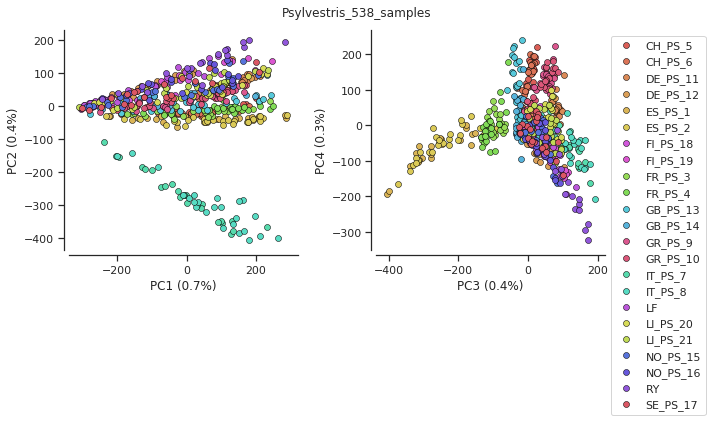

In [17]:
fig_pca(coords1, model1, 'Psylvestris_540_samples')
plt.savefig('/wrk/Gen_Tree/Pinus_sylvestris/Psylvestris_540_samples')